---
title: "Linear models"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-03-24"
categories: [python, datacamp, machine learning, tensorflow, linear model]
image: "LinearModel.png"

---

# Linear models

The purpose of this chapter is to introduce you to TensorFlow 2, where you will learn how to build, solve, and make predictions using models. As part of this assignment, you will focus on a simple class of models - the linear regression model - and attempt to predict the price of housing. In this chapter, you will learn how to load and manipulate data, construct loss functions, perform minimization, make predictions, and reduce resource consumption through batch training.

This **Linear models** is part of [Datacamp course: Introduction to TensorFlow in Python] Until recently, cutting-edge computer vision algorithms could not distinguish between images of cats and dogs. Today, a skilled data scientist equipped with a laptop can classify tens of thousands of objects more accurately than a human eye. This course uses TensorFlow 2.6 to develop, train, and predict models that have fueled major advances in recommendation systems, image classification, and financial technology. In this course, you will learn both high-level APIs that will allow you to design and train deep learning models in 15 lines of code, as well as low-level APIs that will allow you to go beyond off-the-shelf procedures. Additionally, you will learn how to accurately predict housing prices, credit card defaults, and images of sign language gestures.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to TensorFlow in Python]: (https://app.datacamp.com/learn/courses/introduction-to-tensorflow-in-python)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.__version__

'2.12.0'

In [2]:
housing = pd.read_csv('dataset/kc_house_data.csv')

# Print the price column of housing
print(housing['price'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


## Setting the data type
In this exercise, you will both load data and set its type. You will import numpy and tensorflow, and define tensors that are usable in tensorflow using columns in housing with a given data type. Recall that you can select the price column, for instance, from housing using housing['price']

In [4]:
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using case
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

Metal device set to: Apple M2 Pro
[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


# Loss function

![](LinearModel-1.png)
![](LinearModel-2.png)

## Loss functions in TensorFlow
In this exercise, you will compute the loss using data from the King County housing dataset. You are given a target, price, which is a tensor of house prices, and predictions, which is a tensor of predicted house prices. You will evaluate the loss function and print out the value of the loss.

In [5]:
kc_sample = pd.read_csv('dataset/loss_price.csv')
price = kc_sample['price'].to_numpy()
predictions = kc_sample['pred'].to_numpy()

In [6]:
loss = tf.keras.losses.mse(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

141171604777.12714


In [7]:
loss = tf.keras.losses.mae(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

268827.9930208799


In [8]:
print("\nYou may have noticed that the MAE was much smaller than the MSE, even though price and predictions were the same. This is because the different loss functions penalize deviations of predictions from price differently. MSE does not like large deviations and punishes them harshly")


You may have noticed that the MAE was much smaller than the MSE, even though price and predictions were the same. This is because the different loss functions penalize deviations of predictions from price differently. MSE does not like large deviations and punishes them harshly


## Modifying the loss function

In the previous exercise, you defined a tensorflow loss function and evaluated it for a set of actual and predicted values. You will compute the loss within another function called loss_function(), which generates predicted values from the data and variables. We are constructing a function of the trainable model variables that returns the loss. You may then evaluate this function repeatedly for different values of the variables until you find the minimum value. Generally, you will pass this function to an optimizer in TensorFlow.

In [9]:
features = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
targets = tf.constant([2, 4, 6, 8, 10], dtype=tf.float32)

In [12]:
scalar = tf.Variable(1.0, tf.float32)

# Define the model
def model(scalar, features=features):
    return scalar * features

# Define a loss function
def loss_function(scalar, features=features, targets=targets):
    # Compute the predicted values
    predictions = model(scalar, features)

    # Return the mean absolute error loss
    return tf.keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


# Linear regression

![](LinearModel-3.png)

## Set up a linear regression

The univariate linear regression method identifies the relationship between a single feature and the target tensor. We will use the lot size and price of a property in this exercise. As discussed in the video, we will take the natural logarithms of both tensors, which are available as price_log and size_log.

The purpose of this exercise is to define the model and the loss function. The loss function will then be evaluated for two different values of intercept and slope. Predicted values can be calculated by multiplying intercept by features*slope. Furthermore, keras.losses.mse() is available to you. In addition, slope and intercept have been defined as variables.

In [13]:
size_log = np.log(np.array(housing['sqft_lot'], np.float32))
price_log = np.log(np.array(housing['price'], np.float32))
bedrooms = np.array(housing['bedrooms'], np.float32)

In [15]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + slope * features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)

    # Return the mean squared error loss
	return tf.keras.losses.mse(targets,predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

145.44655
71.866


## Train a linear model

In this exercise, we will pick up where the previous exercise ended. The intercept and slope, intercept and slope, have been defined and initialized. Additionally, a function has been defined, loss_function(intercept, slope), which computes the loss using the data and model variables.

You will now define an optimization operation as opt. You will then train a univariate linear model by minimizing the loss to find the optimal values of intercept and slope. Note that the opt operation will try to move closer to the optimum with each step, but will require many steps to find it. Thus, you must repeatedly execute the operation.

In [16]:
import matplotlib.pyplot as plt

def plot_results(intercept, slope):
    size_range = np.linspace(6,14,100)
    price_pred = [intercept + slope * s for s in size_range]
    plt.figure(figsize=(8, 8))
    plt.scatter(size_log, price_log, color = 'black');
    plt.plot(size_range, price_pred, linewidth=3.0, color='red');
    plt.xlabel('log(size)');
    plt.ylabel('log(price)');
    plt.title('Scatterplot of data and fitted regression line');

65.26197
1.4908892
2.3816094
2.9084735
2.611027
1.7605131
1.3468063
1.3559611
1.2884128
1.2425315


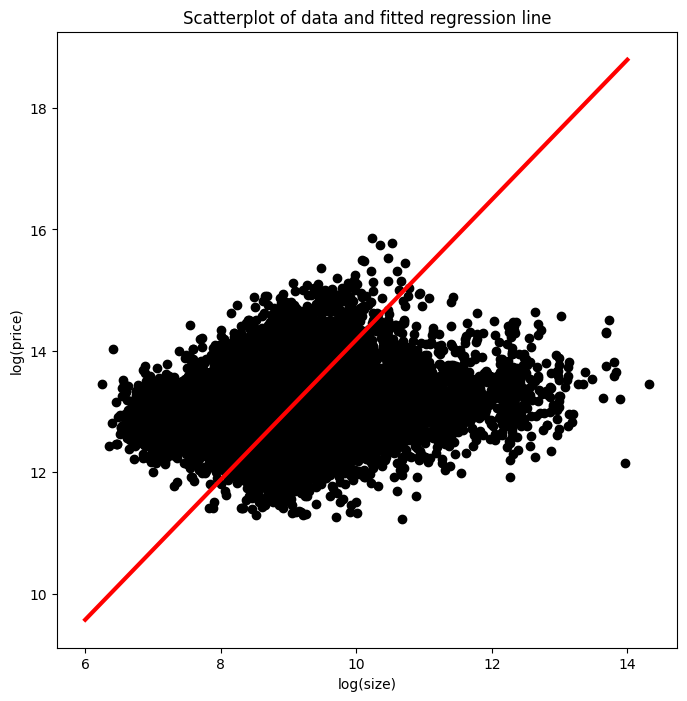

In [17]:
intercept = tf.Variable(0.0, tf.float32)
slope = tf.Variable(0.0, tf.float32)

# Initialize an Adam optimizer
opt = tf.keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

In [18]:
print("\nExcellent! Notice that we printed loss_function(intercept, slope) every 10th execution for 100 executions. Each time, the loss got closer to the minimum as the optimizer moved the slope and intercept parameters closer to their optimal values.")


Excellent! Notice that we printed loss_function(intercept, slope) every 10th execution for 100 executions. Each time, the loss got closer to the minimum as the optimizer moved the slope and intercept parameters closer to their optimal values.


## Multiple linear regression

Most of the time, a univariate linear regression will not produce a model that can be used to make accurate predictions. As part of this exercise, you will perform a multiple regression using more than one feature.

Price_log will be your target and size_log and bedrooms will be your features. The tensors have been defined and are available. Also, you will switch from using the mean squared error loss to the mean absolute error loss: keras.losses.mae(). The predicted values are calculated as follows: params[0] + feature1*params[1] + feature2*params[2]. Instead of using three variables, we have defined a vector of parameters, params, as a variable. In this example, params[0] represents the intercept, and params[1] and params[2] represent the slopes.

In [19]:
def print_results(params):
    return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'
                 .format(loss_function(params).numpy(),
                         params[0].numpy(),
                         params[1].numpy(),
                         params[2].numpy()))

In [21]:
params = tf.Variable([0.1, 0.05, 0.02], tf.float32)

# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)

	# Use the mean absolute error loss
	return tf.keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = tf.keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

loss: 12.418, intercept: 0.101, slope_1: 0.051, slope_2: 0.021
loss: 12.404, intercept: 0.102, slope_1: 0.052, slope_2: 0.022
loss: 12.391, intercept: 0.103, slope_1: 0.053, slope_2: 0.023
loss: 12.377, intercept: 0.104, slope_1: 0.054, slope_2: 0.024
loss: 12.364, intercept: 0.105, slope_1: 0.055, slope_2: 0.025
loss: 12.351, intercept: 0.106, slope_1: 0.056, slope_2: 0.026
loss: 12.337, intercept: 0.107, slope_1: 0.057, slope_2: 0.027
loss: 12.324, intercept: 0.108, slope_1: 0.058, slope_2: 0.028
loss: 12.311, intercept: 0.109, slope_1: 0.059, slope_2: 0.029
loss: 12.297, intercept: 0.110, slope_1: 0.060, slope_2: 0.030


In [23]:
print("\nNote that params[2] tells us how much the price will increase in percentage terms if we add one more bedroom. You could train params[2] and the other model parameters by increasing the number of times we iterate over opt.")


Note that params[2] tells us how much the price will increase in percentage terms if we add one more bedroom. You could train params[2] and the other model parameters by increasing the number of times we iterate over opt.


# Batch training

* Full sample versus batch training
    * Full sample
        * One update per epoch
        * Accepts dataset without modification
        * Limited by memory
    * Batch Training
        * Multiple updates per epoch
        * Requires division of dataset
        * No limit on dataset size

![](LinearModel-4.png)
![](LinearModel-5.png)

## Preparing to batch train

In order to train a linear model in batches, we must first define variables, a loss function, and an optimization operation. In this exercise, we will prepare to train a model that predicts house prices using size_batch, a batch of lot sizes in square feet. As opposed to the previous lesson, we will load batches of data using pandas, convert them into numpy arrays, and then use them to minimize the loss function.

In [24]:
# Define the intercept and slope
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + slope * features

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)

 	# Define the MSE loss
	return tf.keras.losses.mse(targets, predictions)

In [25]:
print("\nNotice that we did not use default argument values for the input data, features and targets. This is because the input data has not been defined in advance. Instead, with batch training, we will load it during the training process")


Notice that we did not use default argument values for the input data, features and targets. This is because the input data has not been defined in advance. Instead, with batch training, we will load it during the training process


## Training a linear model in batches

In this exercise, we will train a linear regression model in batches, beginning where we left off in the previous exercise. We will do this by stepping through the dataset in batches and updating the model's variables, intercept and slope, at each step. By using this approach, we will be able to train with datasets that would otherwise be too large to hold in memory

In [26]:
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Initialize Adam optimizer
opt = tf.keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('dataset/kc_house_data.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217887 0.701598
